In [1]:
import tensorflow as tf

from neuro.nn import activation, layer, losses, models, optimizer


In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

y_train = tf.one_hot(y_train[..., 0], 10)
y_test = y_test[..., 0]


In [3]:
def GetModel():
    return models.Sequential(
        layer.Conv2D(1, 64, (5, 5), padding=2),
        activation.ReLU(),
        layer.Conv2D(64, 32, (3, 3), padding=1, stride=2),
        activation.ReLU(),
        layer.Flatten(),
        layer.Dense(1024, 128),
        activation.ReLU(),
        layer.Dropout(0.1),
        layer.Dense(128, 10),
        activation.StableSoftmax(),
    )


In [4]:
loss = losses.CategoricalCrossentropy()
optimizers = [
    optimizer.SGD(lr=0.01),
    optimizer.AdaGrad(),
    optimizer.RMSProp(),
    optimizer.Adam(),
]


In [5]:
loss_history = {
    "SGD": [],
    "AdaGrad": [],
    "RMSProp": [],
    "Adam": [],
}

In [6]:
current_optimizer = None
epochs = 2
for optim in optimizers:
    model = GetModel()
    if isinstance(optim, optimizer.SGD):
        print("Optimizer: SGD")
        current_optimizer = "SGD"
    elif isinstance(optim, optimizer.AdaGrad):
        print("Optimizer: AdaGrad")
        current_optimizer = "AdaGrad"
    elif isinstance(optim, optimizer.RMSProp):
        print("Optimizer: RMSProp")
        current_optimizer = "RMSProp"
    elif isinstance(optim, optimizer.Adam):
        print("Optimizer: Adam")
        current_optimizer = "Adam"

    batch_size = 64
    for i in range(epochs):
        start, end = 0, batch_size
        batch_num = 0
        while end < tf.shape(x_train)[0]:
            batch_x, batch_y = x_train[start:end], y_train[start:end]
            start, end = end, end + batch_size
            # Forward Propagation
            y_pred = model(batch_x)

            # Calculation of Loss
            train_loss = loss(y_pred, batch_y).numpy()
            print(f"Epoch: {i + 1}, Batch: {batch_num + 1}, Loss: {train_loss}")
            batch_num += 1


            loss_history[current_optimizer].append(train_loss)

            # Back Propagation + Optimizing
            optim(model, loss)

            if (batch_num + 1) % 6 == 0:
                break

Optimizer: SGD
Epoch: 1, Batch: 1, Loss: 2.3097481727600098
Epoch: 1, Batch: 2, Loss: 2.307573080062866
Epoch: 1, Batch: 3, Loss: 2.313593864440918
Epoch: 1, Batch: 4, Loss: 2.281719446182251
Epoch: 1, Batch: 5, Loss: 2.300088882446289
Epoch: 2, Batch: 1, Loss: 2.2945523262023926
Epoch: 2, Batch: 2, Loss: 2.3032431602478027
Epoch: 2, Batch: 3, Loss: 2.3113913536071777
Epoch: 2, Batch: 4, Loss: 2.275951385498047
Epoch: 2, Batch: 5, Loss: 2.3097543716430664
Optimizer: AdaGrad
Epoch: 1, Batch: 1, Loss: 2.3122003078460693
Epoch: 1, Batch: 2, Loss: 2.3069095611572266
Epoch: 1, Batch: 3, Loss: 2.3097023963928223
Epoch: 1, Batch: 4, Loss: 2.2922730445861816
Epoch: 1, Batch: 5, Loss: 2.3177976608276367
Epoch: 2, Batch: 1, Loss: 2.2950377464294434
Epoch: 2, Batch: 2, Loss: 2.260230541229248
Epoch: 2, Batch: 3, Loss: 2.302995204925537
Epoch: 2, Batch: 4, Loss: 2.2763772010803223
Epoch: 2, Batch: 5, Loss: 2.295167922973633
Optimizer: RMSProp
Epoch: 1, Batch: 1, Loss: 2.302570343017578
Epoch: 1, B

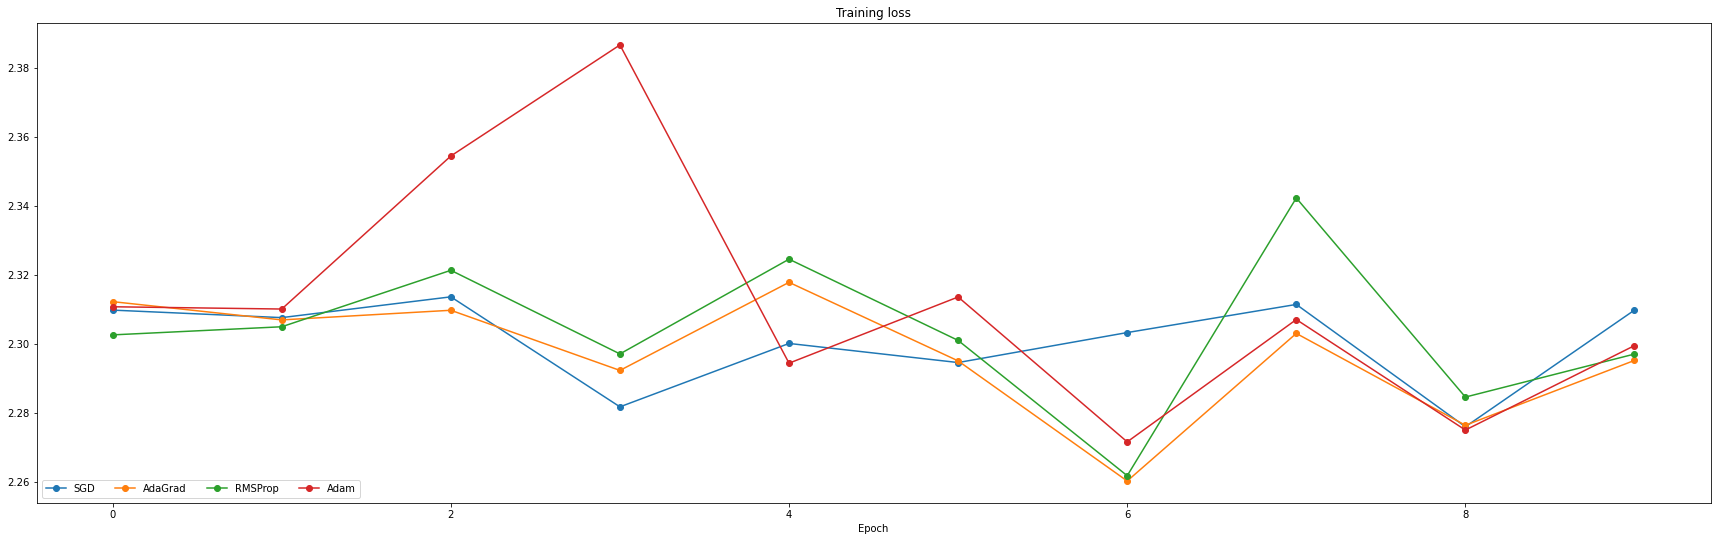

In [7]:
from matplotlib import pyplot as plt

plt.subplot(3, 1, 1)
plt.title("Training loss")
plt.xlabel("Epoch")

for optim, loss_hist in loss_history.items():
    plt.subplot(3, 1, 1)
    plt.plot(loss_hist, "-o", label=optim)


plt.subplot(3, 1, 1)
plt.legend(loc="lower left", ncol=4)
plt.gcf().set_size_inches(30, 30)
plt.show()
